In [7]:
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
from statistics import multimode
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve


# Carregando dados

In [8]:
df = pd.read_csv ('../Data/desafio_manutencao_preditiva_treino.csv',index_col=0)

In [9]:
df.head(5) 

,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
udi,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
7,L47186,L,298.1,308.6,1558,42.4,14,No Failure


# Exploratória


## Exploratória dos tipos de qualidade dos produtos


### Estatísticas: Contagem dos produtos e proporção deles


<AxesSubplot: xlabel='type', ylabel='count'>

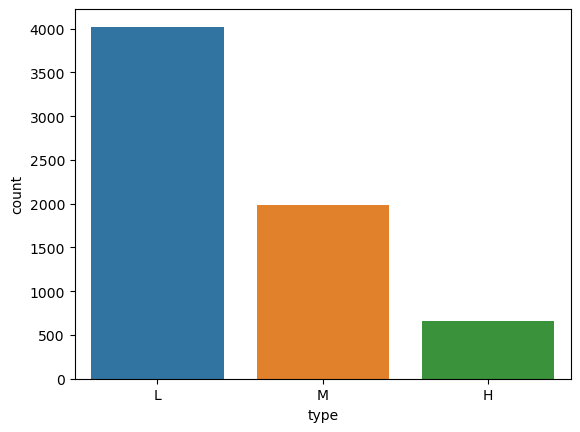

In [10]:
sn.countplot(x=df["type"], order=["L","M","H"])

Contagem dos tipos de qualidade de produtos disponíveis, com maior prevalência para os produtos da categoria L. 

### Estatísticas dos tipos de falhas 

<AxesSubplot: xlabel='count', ylabel='failure_type'>

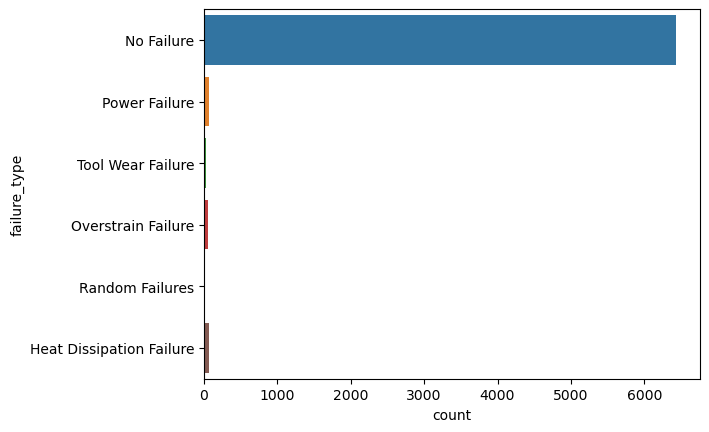

In [11]:
sn.countplot(data=df, y="failure_type")

Contagem dos tipos de falhas. Maior prevalência de produtos sem falha.

<AxesSubplot: xlabel='count', ylabel='failure_type'>

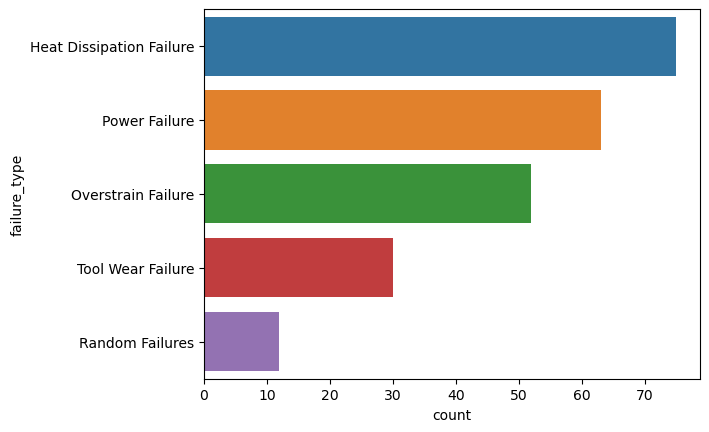

In [12]:
sn.countplot(data=df.query("failure_type!='No Failure'"), y="failure_type", order=["Heat Dissipation Failure", "Power Failure", "Overstrain Failure", "Tool Wear Failure", "Random Failures"])

Retirando da categoria "Tipos de Falha" os produtos sem falha para podermos avaliar melhor a proporção dos tipos de falhas existentes. Maior prevalência da falha do tipo Heat Dissipation Failure. 

### Estatísticas dos tipos de falha por qualidade de produto

<AxesSubplot: xlabel='type', ylabel='count'>

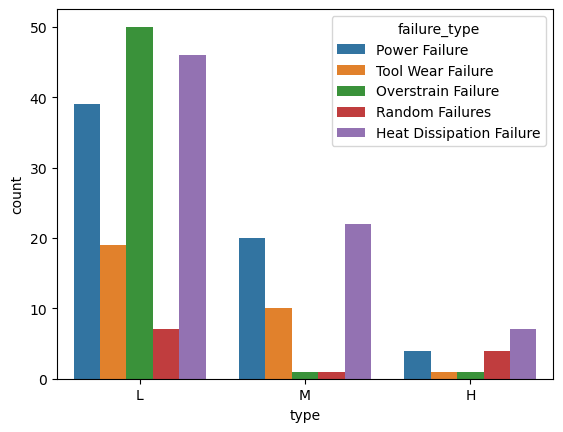

In [13]:
sn.countplot(data=df.query("failure_type!='No Failure'"), x="type", hue="failure_type")

Os tipos de falha por qualidade de produto são:

Produto tipo L: Overstrain Failure, Heat Dissipation Failure, Power Failure, Tool Wear Failure, Random

Produto tipo M: Heat Dissipation, Power Failure e Tool Wear Failure

Produto tipo H: Heat Dissipation Failure, Power Failure e Random


# Exploratória dos Tipos de Variáveis e algumas relações

## Exploratória da variável temperatura do ar *(air_temperature_k)*

<AxesSubplot: xlabel='air_temperature_k', ylabel='Count'>

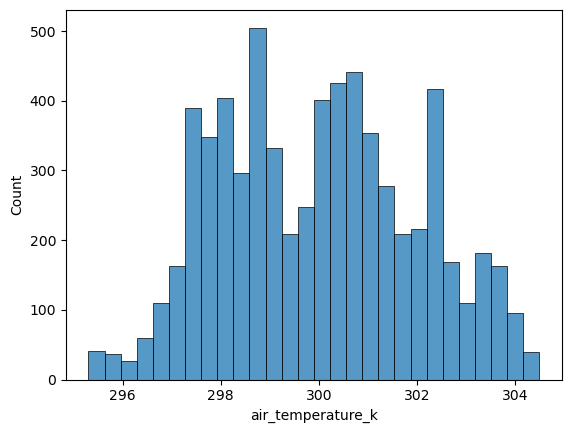

In [35]:
sn.histplot(
    df,
    x="air_temperature_k",
    linewidth=.5
)

In [15]:
df[["air_temperature_k"]].describe()

,air_temperature_k
count,6667.000000
mean,299.992515
std,1.994710
min,295.300000
25%,298.300000
50%,300.000000
75%,301.500000
max,304.500000


Por se tratar de um histograma com aparência simétrica o melhor método estatístico é utilizar a média dos valores e seu desvio padrão.

###  Variável temperatura do ar *(air_temperature_k)* e os tipos de falhas

<AxesSubplot: xlabel='air_temperature_k', ylabel='failure_type'>

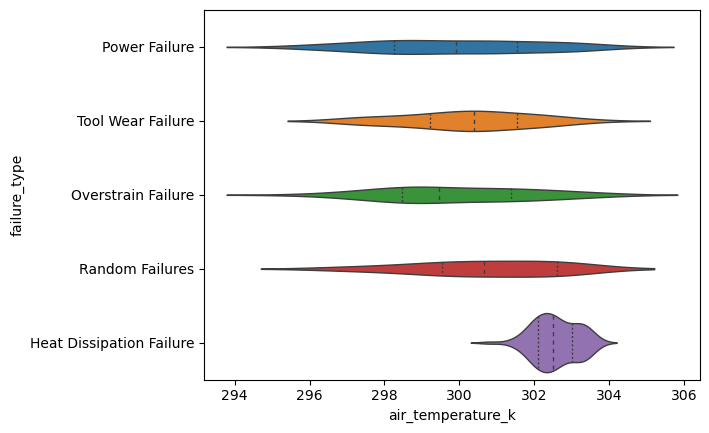

In [16]:
sn.violinplot(data=df.query("failure_type!='No Failure'"), x="air_temperature_k", y="failure_type",
               split=True, inner="quart", linewidth=1)

Observamos que a distribuição da variável *air_temperature_k* está mais concentrada em alguns valores, isso é um indicativo de que essa variável pode ser um bom fator para prever falhas do tipo Heat Dissipation Failure.


### Relação da variável temperatura do ar *(air_temperature_k)* por qualidade de Produto


<AxesSubplot: xlabel='air_temperature_k', ylabel='type'>

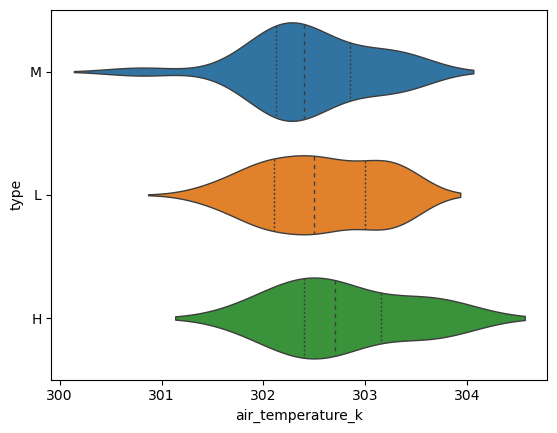

In [17]:
sn.violinplot(data=df.query("failure_type == 'Heat Dissipation Failure'"), x="air_temperature_k", y="type",
               split=True, inner="quart", linewidth=1)

Observamos que a distribuição da variável *air_temperature_k* está concentrada em alguns valores dos tipos de produto. Isso é um indicativo de que as variáveis de qualidade de produto pode não ser um bom fator para prever falhas do tipo Heat Dissipation Failure.


## Exploratória da variável Temperatura do Processo *(process_temperature_k)*

<AxesSubplot: xlabel='process_temperature_k', ylabel='Count'>

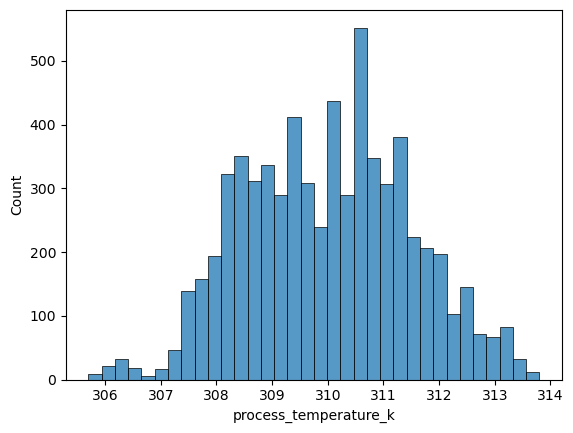

In [19]:
sn.histplot(
    df,
    x="process_temperature_k",
    linewidth=.5
)

In [20]:
df[["process_temperature_k"]].describe()

,process_temperature_k
count,6667.000000
mean,309.992620
std,1.488101
min,305.700000
25%,308.800000
50%,310.000000
75%,311.100000
max,313.800000


Por se tratar de um histograma com aparência simétrica o melhor método estatístico é utilizar a média dos valores e seu desvio padrão.

### Variável temperatura do processo *(process_temperature_k)* e os tipos de falhas 

<AxesSubplot: xlabel='process_temperature_k', ylabel='failure_type'>

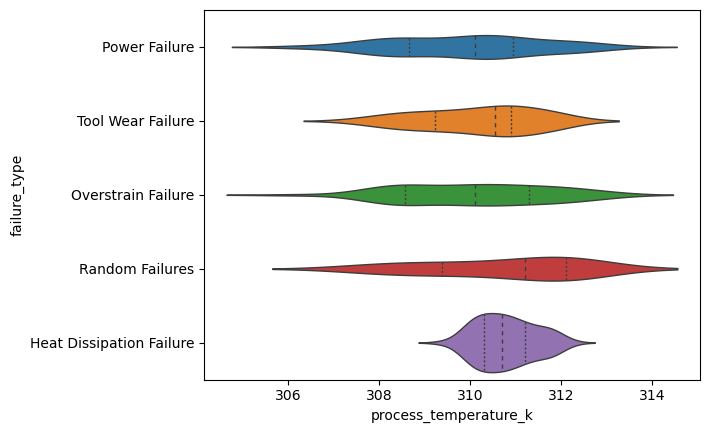

In [21]:
sn.violinplot(data=df.query("failure_type!='No Failure'"), x="process_temperature_k", y="failure_type",
               split=True, inner="quart", linewidth=1)

Observamos que a distribuição da variável temperatura do processo está mais concentrada em alguns valores, isso é um indicativo de que essa variável pode ser um bom fator para prever falhas do tipo Heat Dissipation Failure.


### Relação da variável temperatura do processo *(process_temperature_k)* por qualidade de Produto


<AxesSubplot: xlabel='process_temperature_k', ylabel='type'>

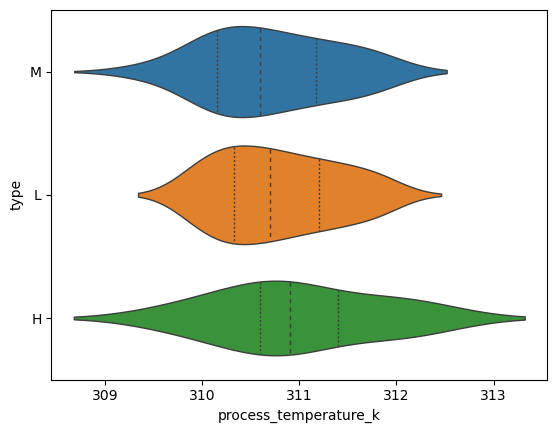

In [22]:
sn.violinplot(data=df.query("failure_type == 'Heat Dissipation Failure'"), x="process_temperature_k", y="type",
               split=True, inner="quart", linewidth=1)

Observamos que a distribuição da variável *process_temperature_k* está concentrada em alguns valores dos tipos de produto. Isso é um indicativo de que as variáveis de qualidade de produto pode não ser um bom fator para prever falhas do tipo Heat Dissipation Failure.


## Exploratória variável RPM


<AxesSubplot: xlabel='rotational_speed_rpm', ylabel='Count'>

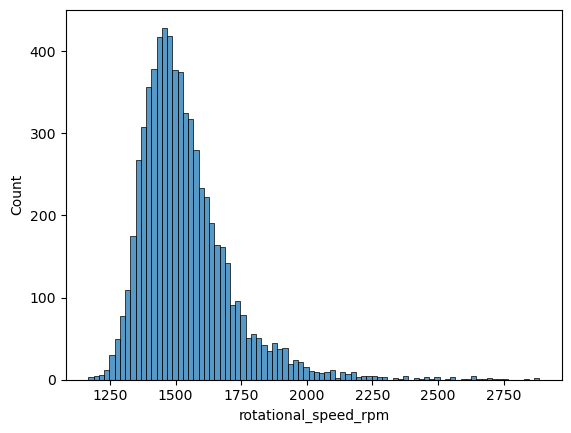

In [24]:
sn.histplot(
    df,
    x="rotational_speed_rpm",
    linewidth=.5
)

In [25]:
df[["rotational_speed_rpm"]].describe()

,rotational_speed_rpm
count,6667.000000
mean,1537.419529
std,177.182908
min,1168.000000
25%,1422.500000
50%,1503.000000
75%,1612.000000
max,2886.000000


Como o histograma apresenta uma cauda para a direita podemos utilizar uma outra representação gráfica, o gráfico em caixas. Também, para esse caso, é mais recomendado utilizar a mediana como método estatístico, pois a média é sensível aos outliers. Usando a mediana e o iqr.

<AxesSubplot: xlabel='rotational_speed_rpm'>

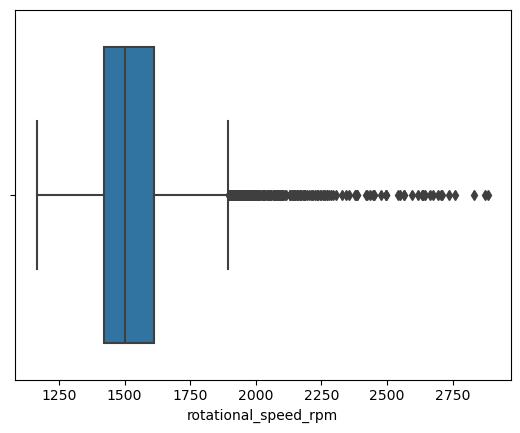

In [26]:
sn.boxplot(x="rotational_speed_rpm", 
            data=df)

In [27]:
q3, q1 = np.percentile(df["rotational_speed_rpm"], [75 ,25])
iqr = q3 - q1
iqr

189.5

### Variável RPM e os tipos de falha

<AxesSubplot: xlabel='rotational_speed_rpm', ylabel='failure_type'>

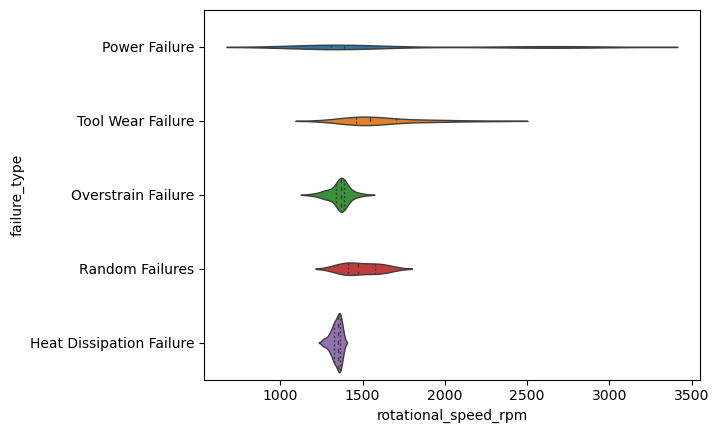

In [28]:
sn.violinplot(data=df.query("failure_type!='No Failure'"), x="rotational_speed_rpm", y="failure_type",
               split=True, inner="quart", linewidth=1)

Observamos que a distribuição da variável *rotational_speed_rpm* está mais concentrada em alguns valores, isso é um indicativo de que essa variável pode ser um bom fator para prever falhas do tipo Heat Dissipation Failure e Overstrain Failure.

### Relação da variável RPM no tipo de falha por Heat Dissipation e a qualidade dos produtos

<AxesSubplot: xlabel='rotational_speed_rpm', ylabel='type'>

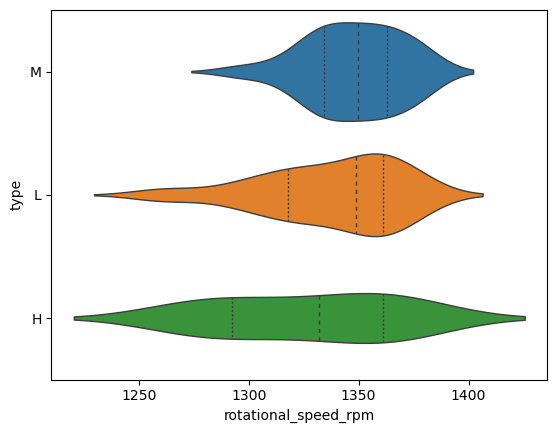

In [29]:
sn.violinplot(data=df.query("failure_type == 'Heat Dissipation Failure'"), x="rotational_speed_rpm", y="type",
               split=True, inner="quart", linewidth=1)

Observamos que a distribuição da variável *rotational_speed_rpm* está concentrada em alguns valores dos tipos de produto. Isso é um indicativo de que as variáveis de qualidade de produto pode não ser um bom fator para prever falhas do tipo Heat Dissipation Failure.

### Relação da variável RPM no tipo de falha Overstrain e a qualidade dos produtos

<AxesSubplot: xlabel='rotational_speed_rpm', ylabel='type'>

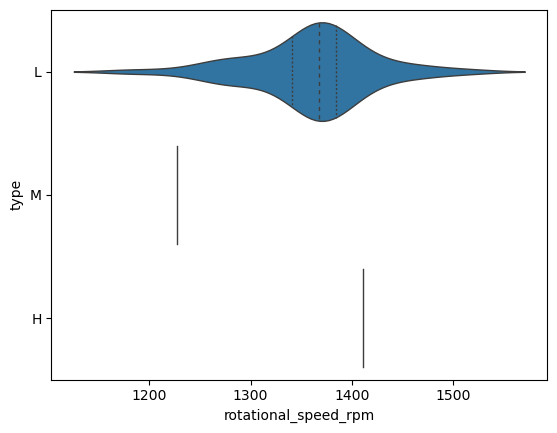

In [22]:
sn.violinplot(data=df.query("failure_type == 'Overstrain Failure'"), x="rotational_speed_rpm", y="type",
               split=True, inner="quart", linewidth=1)

Observamos que a distribuição da variável *rotational_speed_rpm* está concentrada em alguns valores dos tipos de produto da categoria L. Isso é um indicativo de que as variáveis de qualidade de produto, nesse caso, pode ser um bom fator para prever falhas do tipo Overstrain Failure.

## Exploratória da variável Torque

<AxesSubplot: xlabel='torque_nm', ylabel='Count'>

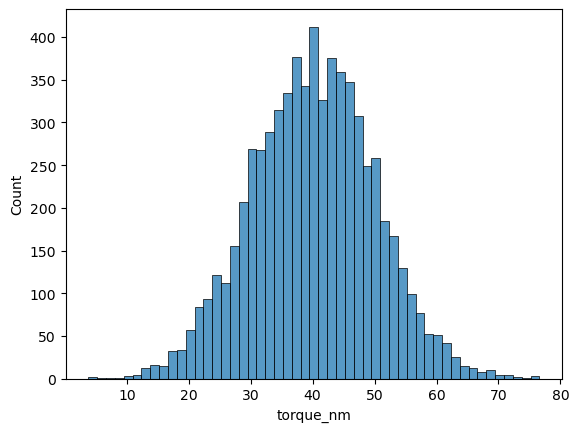

In [30]:
sn.histplot(
    df,
    x="torque_nm",
    linewidth=.5
)

In [31]:
df[["torque_nm"]].describe()

,torque_nm
count,6667.000000
mean,40.058512
std,9.950804
min,3.800000
25%,33.200000
50%,40.200000
75%,46.800000
max,76.600000


### Variável Torque e os tipos de falha

<AxesSubplot: xlabel='torque_nm', ylabel='failure_type'>

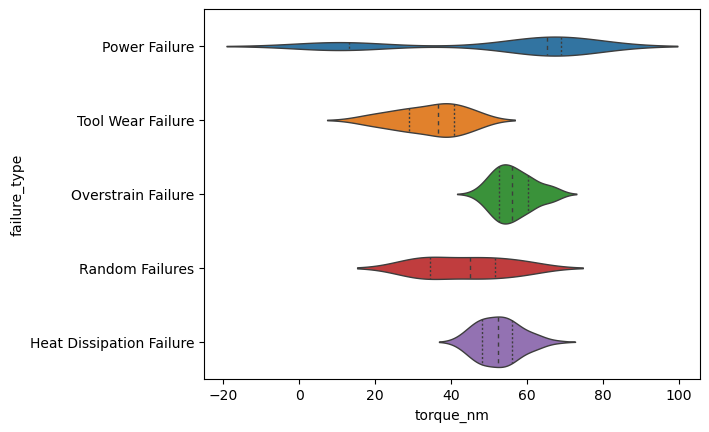

In [25]:
sn.violinplot(data=df.query("failure_type!='No Failure'"), x="torque_nm", y="failure_type",
               split=True, inner="quart", linewidth=1)

Observamos que a distribuição da variável *torque_nm* está mais concentrada em alguns valores, isso é um indicativo de que essa variável pode ser um bom fator para prever falhas do tipo Heat Dissipation Failure, Overstrain Failure e Tool Wear Failure.

### Relação da variável Torque no tipo de falha por Heat Dissipation e a qualidade dos produtos

<AxesSubplot: xlabel='torque_nm', ylabel='type'>

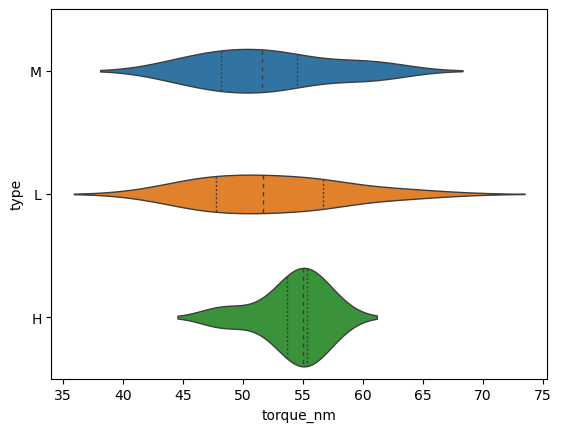

In [26]:
sn.violinplot(data=df.query("failure_type == 'Heat Dissipation Failure'"), x="torque_nm", y="type",
               split=True, inner="quart", linewidth=1)

Observamos que a distribuição da variável *torque_nm* está concentrada em alguns valores dos tipos de produto. Isso é um indicativo de que as variáveis de qualidade de produto pode não ser um bom fator para prever falhas do tipo Heat Dissipation Failure.

### Relação da variável Torque no tipo de falha por Overstrain Failure e a qualidade dos produtos

<AxesSubplot: xlabel='torque_nm', ylabel='type'>

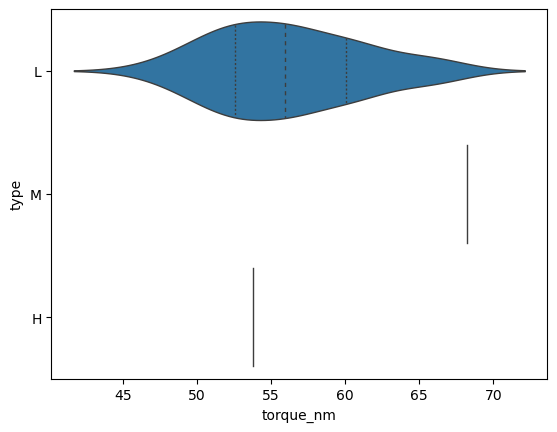

In [27]:
sn.violinplot(data=df.query("failure_type == 'Overstrain Failure'"), x="torque_nm", y="type",
               split=True, inner="quart", linewidth=1)

Observamos que a distribuição da variável *torque_nm* está concentrada em alguns valores dos tipos de produto da categoria L. Isso é um indicativo de que as variáveis de qualidade de produto, nesse caso, pode ser um bom fator para prever falhas do tipo Overstrain Failure.

### Relação da variável Torque no tipo de falha por Tool Wear Failure e a qualidade dos produtos

<AxesSubplot: xlabel='torque_nm', ylabel='type'>

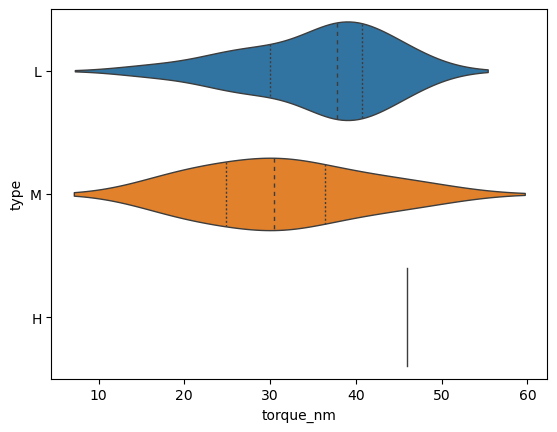

In [28]:
sn.violinplot(data=df.query("failure_type == 'Tool Wear Failure'"), x="torque_nm", y="type",
               split=True, inner="quart", linewidth=1)

Observamos que a distribuição da variável *torque_nm* está concentrada em alguns valores dos tipos de produto. Isso é um indicativo de que as variáveis de qualidade de produto pode não ser um bom fator para prever falhas do tipo Tool Wear Failure.

## Exploratória da variável  Tool Wear min

<AxesSubplot: xlabel='tool_wear_min', ylabel='Count'>

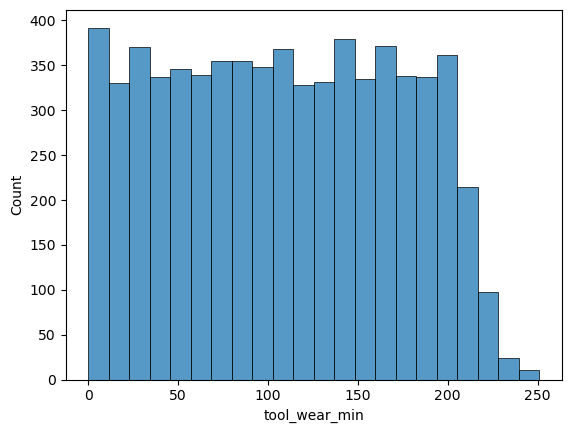

In [32]:
sn.histplot(
    df,
    x="tool_wear_min",
    linewidth=.5
)

In [33]:
df[["tool_wear_min"]].describe()

,tool_wear_min
count,6667.000000
mean,108.098095
std,63.359915
min,0.000000
25%,54.000000
50%,108.000000
75%,162.000000
max,251.000000


### Variável Tool Wear e os tipos de falha

<AxesSubplot: xlabel='tool_wear_min', ylabel='failure_type'>

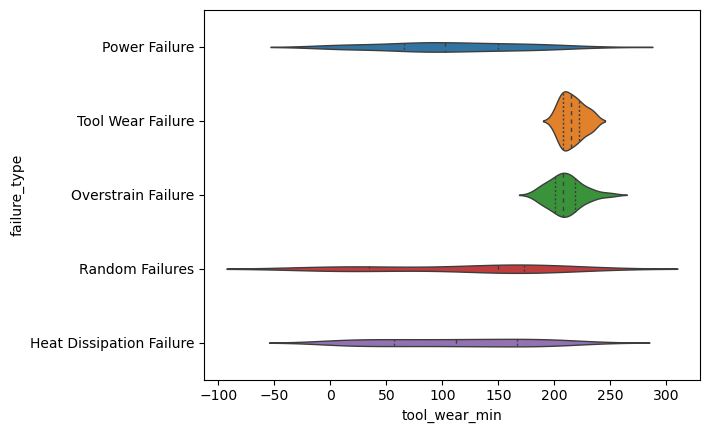

In [31]:
sn.violinplot(data=df.query("failure_type!='No Failure'"), x="tool_wear_min", y="failure_type",
               split=True, inner="quart", linewidth=1)

Observamos que a distribuição da variável *tool_wear_min* está mais concentrada em alguns valores, isso é um indicativo de que essa variável pode ser um bom fator para prever falhas do tipo Tool Wear Failure e Overstrain Failure.

### Relação da variável Tool Wear no tipo de falha por Tool Wear Failure e a qualidade dos produtos

<AxesSubplot: xlabel='tool_wear_min', ylabel='type'>

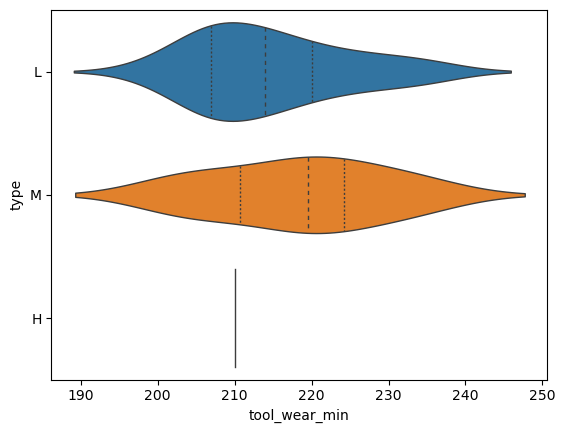

In [36]:
sn.violinplot(data=df.query("failure_type == 'Tool Wear Failure'"), x="tool_wear_min", y="type",
               split=True, inner="quart", linewidth=1)

Observamos que a distribuição da variável *tool_wear_min* está concentrada em alguns valores dos tipos de produto. Isso é um indicativo de que as variáveis de qualidade de produto pode não ser um bom fator para prever falhas do tipo Tool Wear Failure.

### Relação da variável Tool Wear no tipo de falha por Overstrain Failure e a qualidade dos produtos

<AxesSubplot: xlabel='tool_wear_min', ylabel='type'>

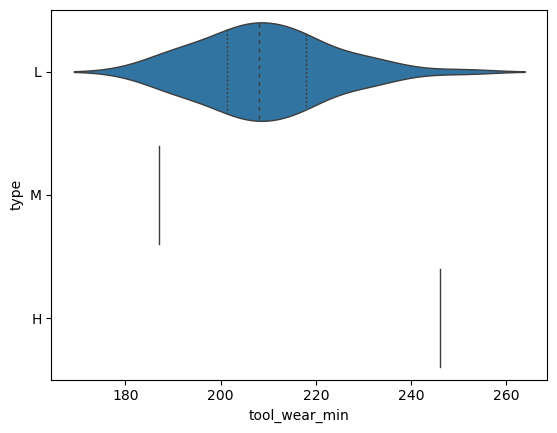

In [33]:
sn.violinplot(data=df.query("failure_type == 'Overstrain Failure'"), x="tool_wear_min", y="type",
               split=True, inner="quart", linewidth=1)

Observamos que a distribuição da variável *tool_wear_min* está concentrada em alguns valores dos tipos de produto da categoria L. Isso é um indicativo de que, nesse caso, as variáveis de qualidade de produto pode ser um bom fator para prever falhas do tipo Overstrain Failure.

# Modelagem

## Qual tipo de problema que estamos resolvendo? 


Estamos resolvendo um problema de classificação pois temos o desfecho em classes (tipos de falhas) e suas variáveis relacionadas pra cada condição

## Pré-processamento de dados: transformando os dados da coluna Type para tipo float

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['type']])
print(transformed.toarray())

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [39]:
print(ohe.categories_)


[array(['H', 'L', 'M'], dtype=object)]


In [40]:
df[ohe.categories_[0]] = transformed.toarray()
print(df.head())

    product_id type  air_temperature_k  process_temperature_k  \
udi                                                             
1       M14860    M              298.1                  308.6   
2       L47181    L              298.2                  308.7   
5       L47184    L              298.2                  308.7   
6       M14865    M              298.1                  308.6   
7       L47186    L              298.1                  308.6   

     rotational_speed_rpm  torque_nm  tool_wear_min failure_type    H    L  \
udi                                                                          
1                    1551       42.8              0   No Failure  0.0  0.0   
2                    1408       46.3              3   No Failure  0.0  1.0   
5                    1408       40.0              9   No Failure  0.0  1.0   
6                    1425       41.9             11   No Failure  0.0  0.0   
7                    1558       42.4             14   No Failure  0.0  1.0  

## Preparando banco de dados para o modelo

Observação: iremos retirar a categoria aleatória do modelo pois independete dos parâmetros haverá uma taxa de falha. 

In [41]:
df_treino=df.query("failure_type!='Random Failures'")

In [42]:
X=df_treino.drop(columns=['product_id','type', 'failure_type'])


In [43]:
y=df_treino["failure_type"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, stratify = y)


## Treinando o modelo Random Forest

In [45]:
clf = RandomForestClassifier(n_estimators=1000,random_state=0, class_weight = "balanced_subsample")

In [46]:
clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced_subsample', n_estimators=1000,
                       random_state=0)

## Avaliando o modelo

### Fazendo vetor de predição para comparar com o que temos disponível nos dados de treinamento

In [47]:
y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test))



                          precision    recall  f1-score   support

Heat Dissipation Failure       0.86      0.55      0.67        22
              No Failure       0.98      1.00      0.99      1931
      Overstrain Failure       1.00      0.25      0.40        16
           Power Failure       1.00      0.37      0.54        19
       Tool Wear Failure       0.00      0.00      0.00         9

                accuracy                           0.98      1997
               macro avg       0.77      0.43      0.52      1997
            weighted avg       0.97      0.98      0.97      1997



## Importância dos fatores

In [48]:
importances = clf.feature_importances_


In [49]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

In [50]:
feature_names = X_train.columns


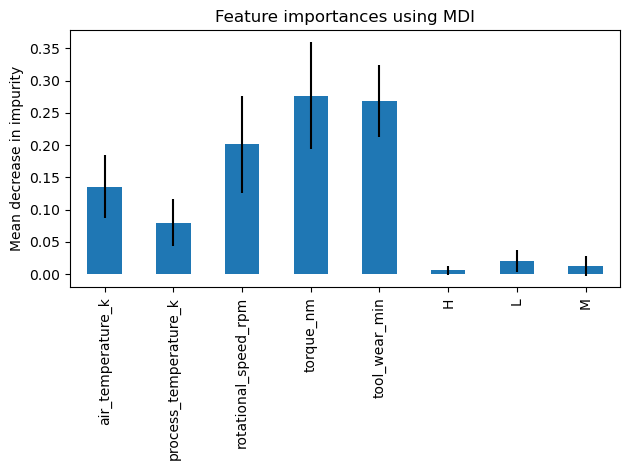

In [51]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Aplicando a estratégia de criar dados sintéticos sobre as classes minoritários para melhorar o treino usando SMOTE

Para os testes temos uma amostra não-balanceada de dados, uma vez que não há quantidade de amostras iguais para cada caso de erro (há erros com mais amostras, por exemplo), e isso pode causar um treinamento enviesado. O SMOTE é uma técnica que vai ou duplicar os dados minoritários ou criar esses dados minoritários sinteticamente ou reduzir as amostras da classe majoritária. https://arxiv.org/pdf/2201.08528.pdf

### Preparando o ambiente

In [52]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

### Definindo e treinando modelo Random Forest

In [53]:
smclf = RandomForestClassifier(n_estimators=1000,random_state=0, class_weight = "balanced_subsample")

In [54]:
smclf.fit(X_res, y_res)


RandomForestClassifier(class_weight='balanced_subsample', n_estimators=1000,
                       random_state=0)

In [55]:
y_pred_test = smclf.predict(X_test)
print(classification_report(y_test, y_pred_test))


                          precision    recall  f1-score   support

Heat Dissipation Failure       0.59      0.73      0.65        22
              No Failure       0.99      0.98      0.98      1931
      Overstrain Failure       0.79      0.94      0.86        16
           Power Failure       0.67      0.63      0.65        19
       Tool Wear Failure       0.06      0.11      0.08         9

                accuracy                           0.97      1997
               macro avg       0.62      0.68      0.64      1997
            weighted avg       0.98      0.97      0.97      1997



Análise utilizando SMOTE


### Importância dos fatores

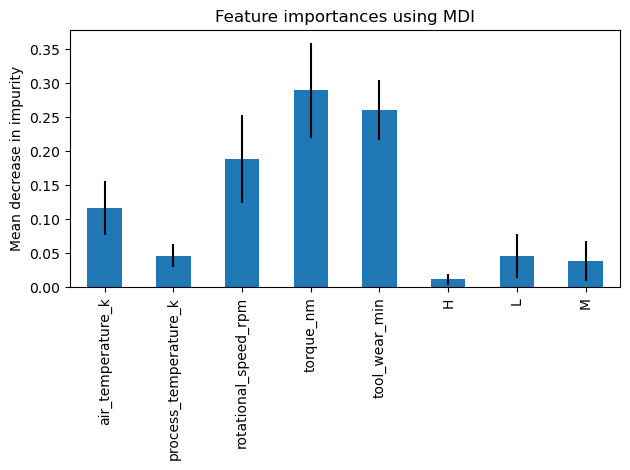

In [56]:
importances = smclf.feature_importances_
std = np.std([tree.feature_importances_ for tree in smclf.estimators_], axis=0)
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Comparando os resultados das análises (sem dados sintéticos e com dados sintéticos)

Comparando o recall de ambas as análises podemos notar que ao utilizar o SMOTE para criação de dados sintéticos sobre as classes minoritárias há uma melhora significativa nos valores. No caso, o recall é uma métrica de performance interessante de ser considerada pois ela considera os falsos negativos também. Percebemos que o f1-score dos dados tratados com SMOTE é ligeiramente melhor. https://medium.com/kunumi/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-em-machine-learning-classifica%C3%A7%C3%A3o-49340dcdb198

In [57]:
y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test))


                          precision    recall  f1-score   support

Heat Dissipation Failure       0.86      0.55      0.67        22
              No Failure       0.98      1.00      0.99      1931
      Overstrain Failure       1.00      0.25      0.40        16
           Power Failure       1.00      0.37      0.54        19
       Tool Wear Failure       0.00      0.00      0.00         9

                accuracy                           0.98      1997
               macro avg       0.77      0.43      0.52      1997
            weighted avg       0.97      0.98      0.97      1997



 Sem utilizar SMOTE

In [58]:
y_pred_test = smclf.predict(X_test)
print(classification_report(y_test, y_pred_test))


                          precision    recall  f1-score   support

Heat Dissipation Failure       0.59      0.73      0.65        22
              No Failure       0.99      0.98      0.98      1931
      Overstrain Failure       0.79      0.94      0.86        16
           Power Failure       0.67      0.63      0.65        19
       Tool Wear Failure       0.06      0.11      0.08         9

                accuracy                           0.97      1997
               macro avg       0.62      0.68      0.64      1997
            weighted avg       0.98      0.97      0.97      1997



Utilizando SMOTE

Ao observarmos os gráficos de caixa sobre a importância dos fatores na classificação podemos perceber que a qualidade dos produtos, em ambas as técnicas (sem SMOTE e com SMOTE) não é um fator determinante na hora de treinar o modelo para prever as falhas. 

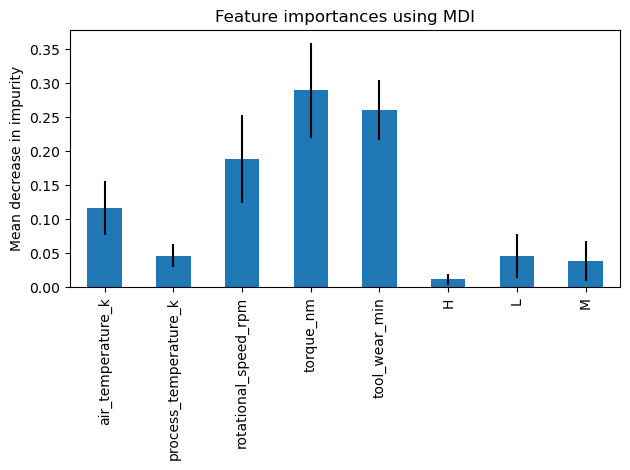

In [59]:
importances = smclf.feature_importances_
std = np.std([tree.feature_importances_ for tree in smclf.estimators_], axis=0)
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Neste gráfico notamos a variável torque como sendo uma das mais significativas. Como vimos na seção "Exploratória da variável Torque", a variável torque está concentrado em três tipos de falha: Heat Dissipation, Overstrain e Tool Wear. Isso pode justificar a importância apresentada neste gráfico acima. 

# Previsões

Fazendo as previsões utilizando o melhor modelo selecionado

### Primeiro passo: carregando os dados de teste

In [60]:
df_teste = pd.read_csv ('../Data/desafio_manutencao_preditiva_teste.csv',index_col=0)

In [61]:
df_teste.head(3) 

,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
udi,,,,,,,
446,L47625,L,297.5,308.6,1793,26.7,70
7076,L54255,L,300.7,310.5,1536,47.4,192
1191,L48370,L,297.2,308.4,1460,42.1,41


Pré-processamento

In [62]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_teste[['type']])
print(transformed.toarray())

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [63]:
print(ohe.categories_)


[array(['H', 'L', 'M'], dtype=object)]


In [64]:
df_teste[ohe.categories_[0]] = transformed.toarray()
print(df_teste.head())

     product_id type  air_temperature_k  process_temperature_k  \
udi                                                              
446      L47625    L              297.5                  308.6   
7076     L54255    L              300.7                  310.5   
1191     L48370    L              297.2                  308.4   
2618     L49797    L              299.4                  309.1   
5067     L52246    L              304.1                  313.1   

      rotational_speed_rpm  torque_nm  tool_wear_min    H    L    M  
udi                                                                  
446                   1793       26.7             70  0.0  1.0  0.0  
7076                  1536       47.4            192  0.0  1.0  0.0  
1191                  1460       42.1             41  0.0  1.0  0.0  
2618                  1670       35.9             68  0.0  1.0  0.0  
5067                  1550       30.9              9  0.0  1.0  0.0  


In [65]:
X_final=df_teste.drop(columns=['product_id','type'])


In [66]:
y_pred_final = smclf.predict(X_final) #acessa o modelo que treinei e prediz os dados com base na planilha de treino


In [67]:
df_resultado=pd.DataFrame(y_pred_final).reset_index()
df_resultado.columns = ["rowNumber", "predictedValues"]
df_resultado.head()

,rowNumber,predictedValues
0,0,No Failure
1,1,No Failure
2,2,No Failure
3,3,No Failure
4,4,No Failure


In [68]:
df_resultado.to_csv('../Data/predicted.csv',index=False)